In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

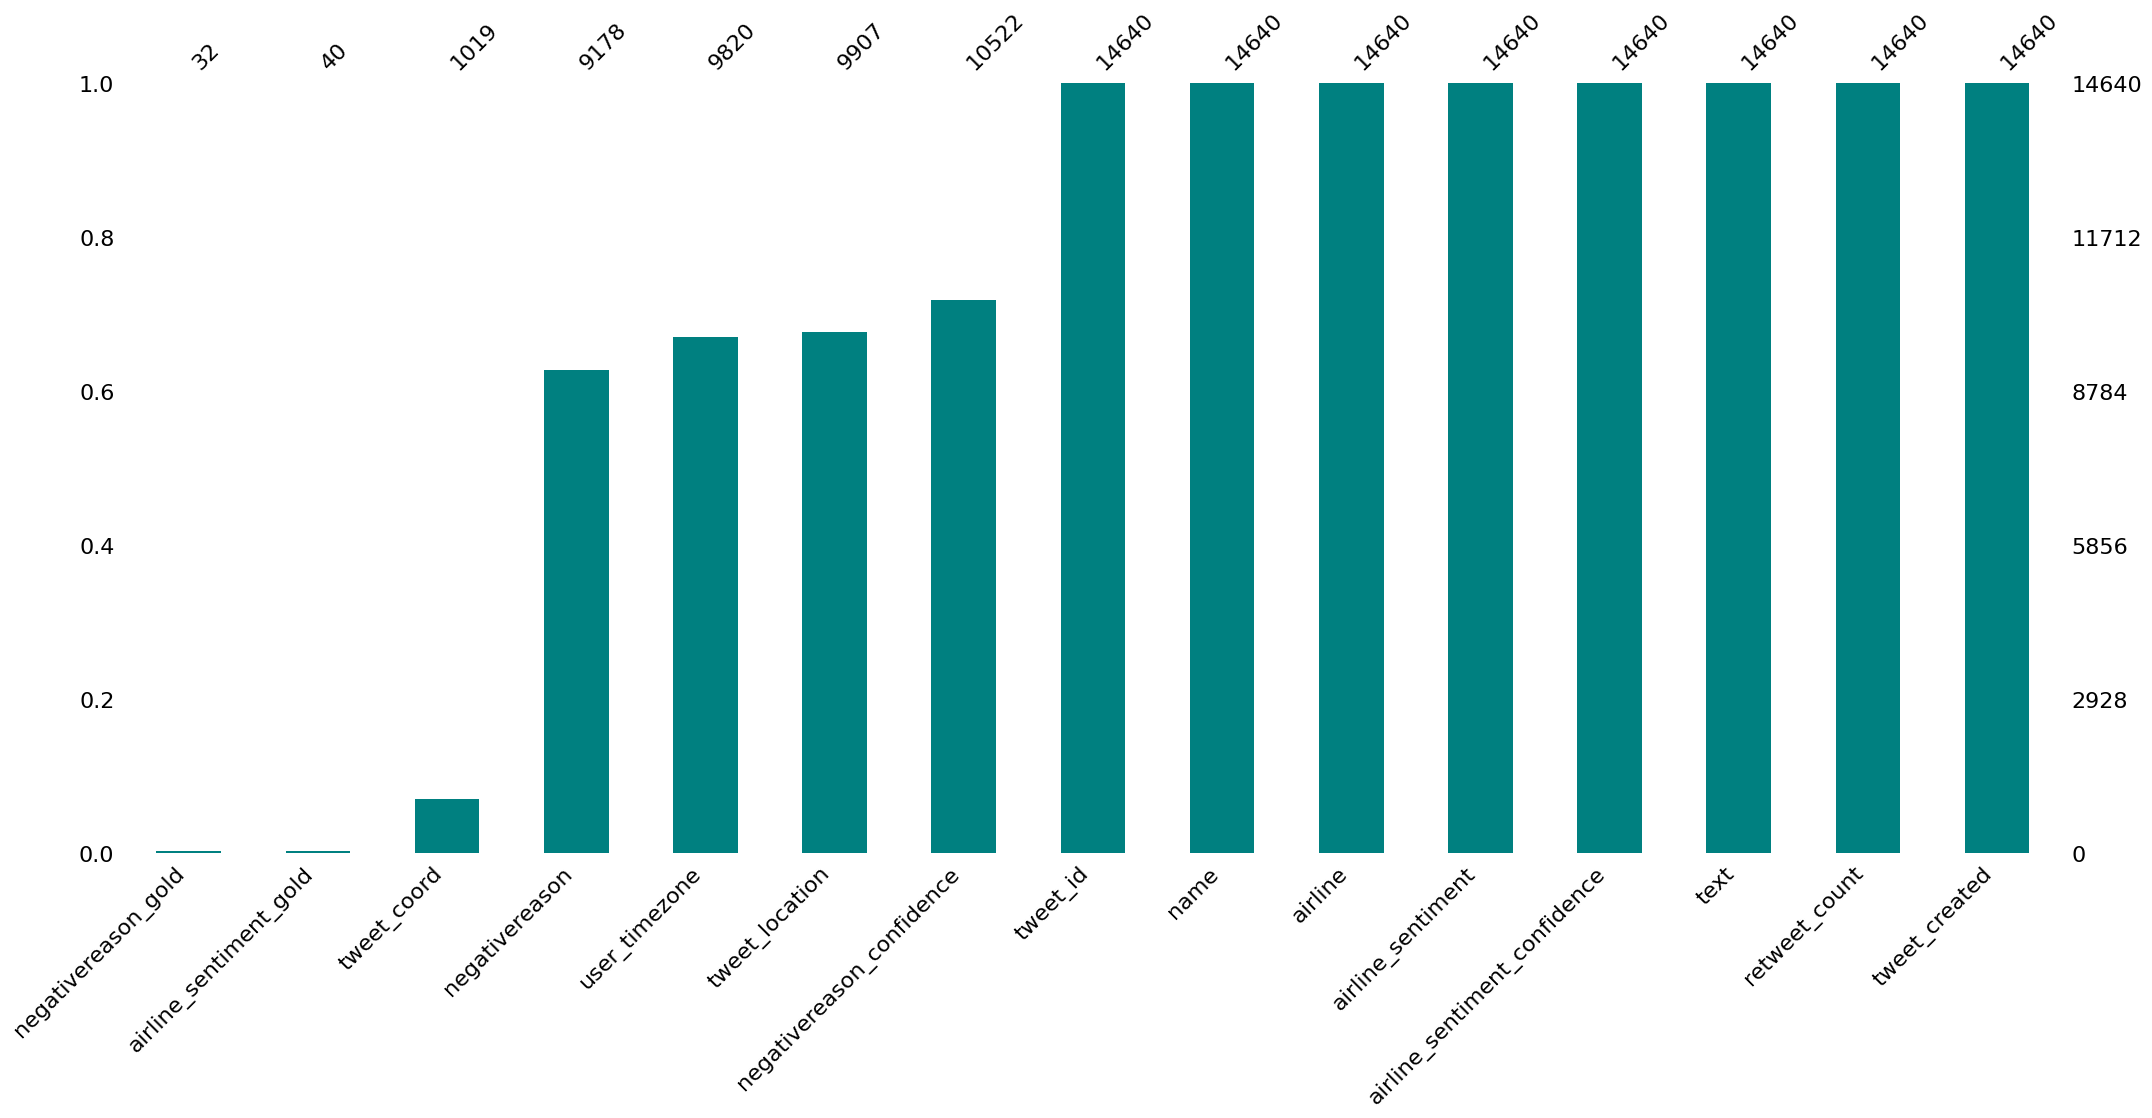

In [3]:
mns.bar(df, color='teal',sort='ascending')

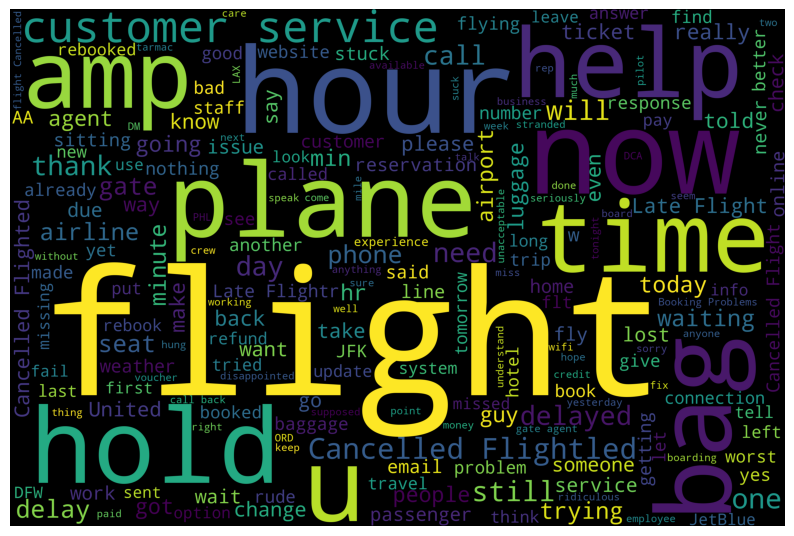

In [4]:
newdata = df[df['airline_sentiment'] == 'negative']
words = ' '.join(newdata['text'])
clw = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])

WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2000). generate(clw)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [ ]:
newdata = df[df['airline_sentiment'] == 'positive']
words = ' '.join(newdata['text'])
clw = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])

WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2000). generate(clw)
plt.figure(1,figsize=(10,10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

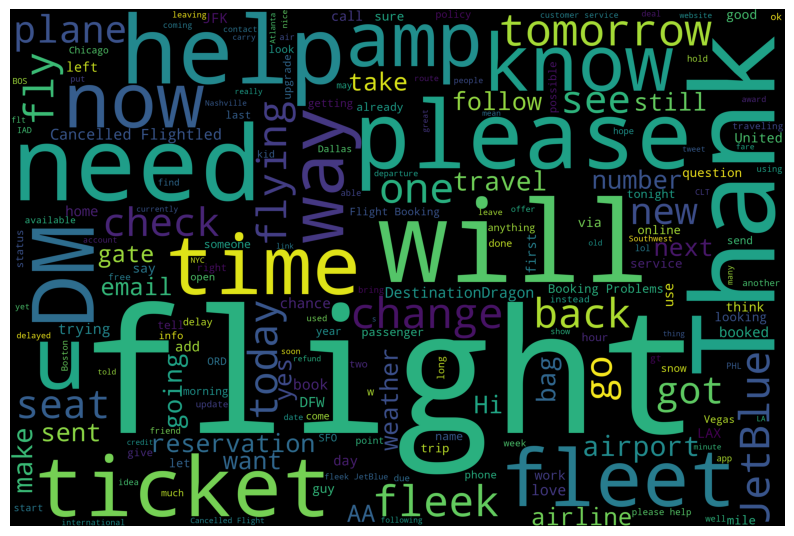

In [6]:
newdata = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(newdata['text'])
clw = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])

WC = WordCloud(stopwords=STOPWORDS,background_color='black',width=3000, height=2000). generate(clw)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [7]:
df ['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [8]:
from sklearn.utils import resample
df_neg = df[df['airline_sentiment'] == 'negative']
df_pos = df[df['airline_sentiment'] == 'positive']
df_neu  = df[df['airline_sentiment'] == 'neutral']
df_pos_samp = resample(df_pos, n_samples=9178)
df_neu_samp = resample(df_neu, n_samples=9178)
df = pd.concat([df_neg,df_pos_samp,df_neu_samp])
df = df.sample(frac=1)
df['airline_sentiment'].value_counts()

airline_sentiment
neutral     9178
negative    9178
positive    9178
Name: count, dtype: int64

In [9]:
#Text Cleaning
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(x, stem =False):
    x = re.sub(text_cleaning_re, " ", str.lower(x)).strip()
    tokens = []
    for token in x.split("\n"):
        if token not in stop_words:
            if stem:
                token.append(stem.SnowballStemmer(token))
            else:
                tokens.append(token)
        return" ".join(tokens)
df.text = df.text.apply(lambda x:preprocess(x))
df.text        

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user\AppData\Local\Temp\ipykernel_7748\1963033048.py:2: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


5508     traveling 2bwi nmaryland 2morrw any chance the...
13068    but my friend was told she was able to use her...
10251    how do you manage to place a family of 5 into ...
2825     its my one and only checked bag which is check...
7178     thanks used phone instead of computer and it w...
                               ...                        
4507           cool shot of the moon and one of your fleet
8985     well i did miss it but gate agents had rebooke...
12936    delaney and shawn at dfw showed exceptional cu...
6379     snow forecasted for raleigh nc tomorrow night ...
8702                 finally taking off las fll sju letsgo
Name: text, Length: 27534, dtype: object

In [22]:
clf1 = Pipeline([('Vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',MultinomialNB())])
clf2 = Pipeline([('Vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',BernoulliNB())])
clf3 = Pipeline([('Vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [13]:
x = df.text
y = df['airline_sentiment']
xtrain,xtext,ytrain,ytext = train_test_split(x,y, test_size=0.2)

In [14]:
clf1.fit(xtrain, ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

              precision    recall  f1-score   support

    negative       0.96      0.80      0.87      1842
     neutral       0.85      0.95      0.90      1823
    positive       0.93      0.98      0.95      1842

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.91      5507
weighted avg       0.91      0.91      0.91      5507



<Axes: >

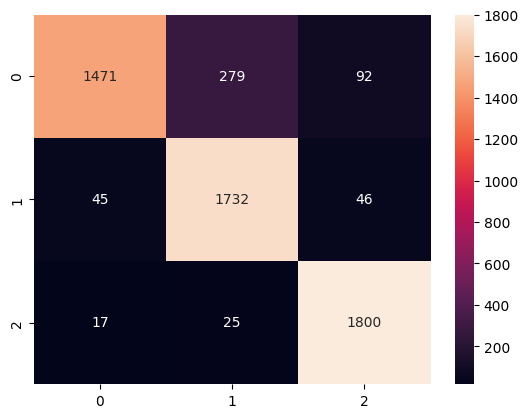

In [19]:
pred1 = clf1.predict(xtext)
print(classification_report(ytext,pred1))
cm = confusion_matrix(ytext,pred1)
sns.heatmap(cm, annot = True, fmt = '0.5g')

In [23]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])

              precision    recall  f1-score   support

    negative       0.84      0.81      0.82      1842
     neutral       0.82      0.79      0.81      1823
    positive       0.83      0.90      0.86      1842

    accuracy                           0.83      5507
   macro avg       0.83      0.83      0.83      5507
weighted avg       0.83      0.83      0.83      5507



<Axes: >

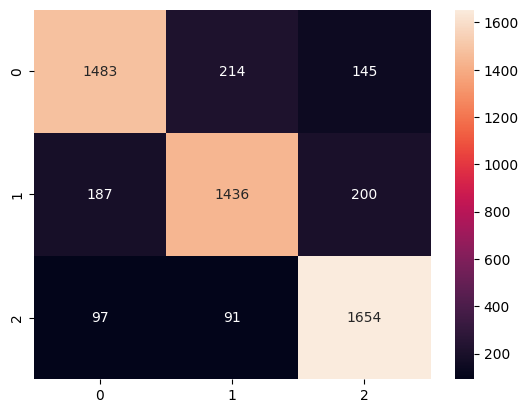

In [24]:
pred2 = clf2.predict(xtext)
print(classification_report(ytext,pred2))
cm = confusion_matrix(ytext,pred2)
sns.heatmap(cm, annot = True, fmt = '0.5g')

In [25]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

              precision    recall  f1-score   support

    negative       0.95      0.79      0.86      1842
     neutral       0.85      0.95      0.90      1823
    positive       0.93      0.98      0.95      1842

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.90      5507
weighted avg       0.91      0.91      0.90      5507



<Axes: >

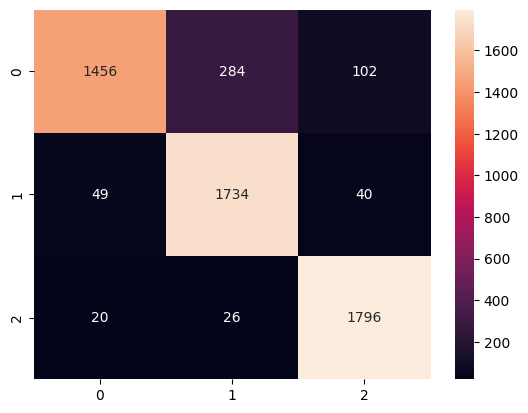

In [27]:
pred3 = clf3.predict(xtext)
print(classification_report(ytext,pred3))
cm = confusion_matrix(ytext,pred3)
sns.heatmap(cm, annot = True, fmt = '0.5g')